#A


### Problem Statement :

To identify the factors influencing customer churn and predict whether a customer will leave the telecommunications service.



### Objectives :  
1. Predict customer churn using demographic, service, and billing data.  
2. Identify key factors influencing churn, such as contract type, tenure, and service usage.  
3. Provide actionable insights to reduce churn and improve customer satisfaction.  
4. Segment customers to design targeted retention and marketing strategies.  
5. Boost revenue by retaining high-value customers and improving service offerings.  

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:

df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


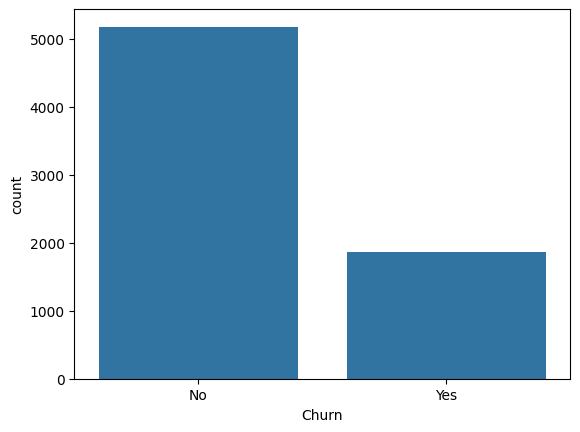

In [ ]:
sns.countplot(data=df,x='Churn')
plt.show()

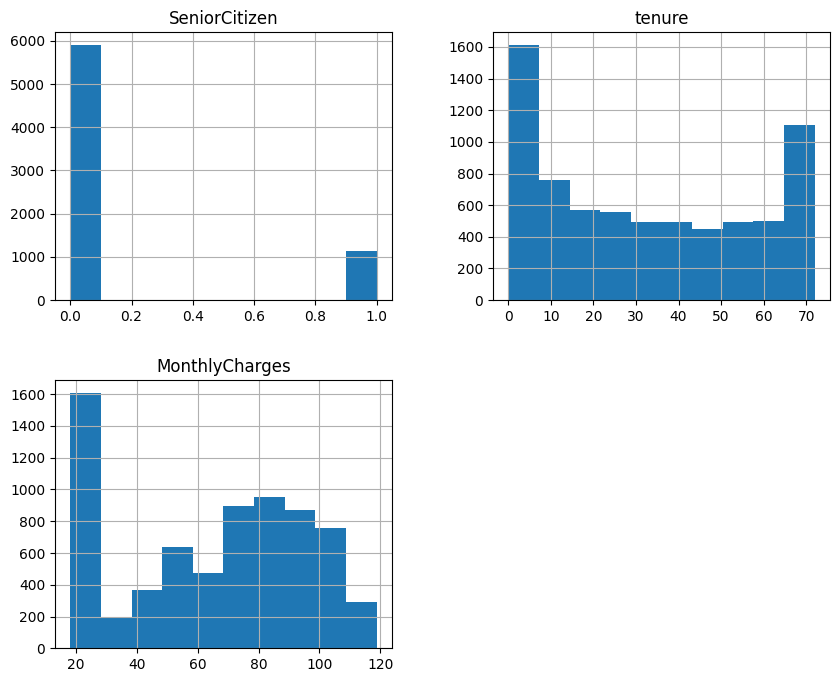

In [ ]:
df.hist(figsize=(10,8))
plt.show()

In [ ]:
labelencoder = LabelEncoder()
df['customerID'] = labelencoder.fit_transform(df['customerID'])
df['gender'] = labelencoder.fit_transform(df['gender'])
df['Partner'] = labelencoder.fit_transform(df['Partner'])
df['Dependents'] = labelencoder.fit_transform(df['Dependents'])
df['PhoneService'] = labelencoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = labelencoder.fit_transform(df['MultipleLines'])
df['InternetService'] = labelencoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = labelencoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = labelencoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = labelencoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = labelencoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = labelencoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = labelencoder.fit_transform(df['StreamingMovies'])
df['Contract'] = labelencoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = labelencoder.fit_transform(df['PaperlessBilling'])

df['PaymentMethod'] = labelencoder.fit_transform(df['PaymentMethod'])
df['Churn'] = labelencoder.fit_transform(df['Churn'])
df['TotalCharges'] = labelencoder.fit_transform(df['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
X = df.drop('Churn', axis=1)
y= df['Churn']
ros= SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)
df=pd.concat([X_resampled, y_resampled], axis=1)
df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.850000,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.950000,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.850000,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.300000,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.700000,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,4716,0,1,0,0,24,0,1,0,0,...,1,0,0,1,0,1,2,64.683801,3681,1
10344,5726,0,0,0,0,9,1,2,1,0,...,0,0,0,0,0,1,2,79.542386,5924,1
10345,2021,1,0,0,0,20,0,0,0,0,...,2,0,0,0,0,1,0,69.853546,2785,1
10346,491,1,0,0,0,27,1,1,1,0,...,0,0,0,0,0,1,1,78.413816,1722,1


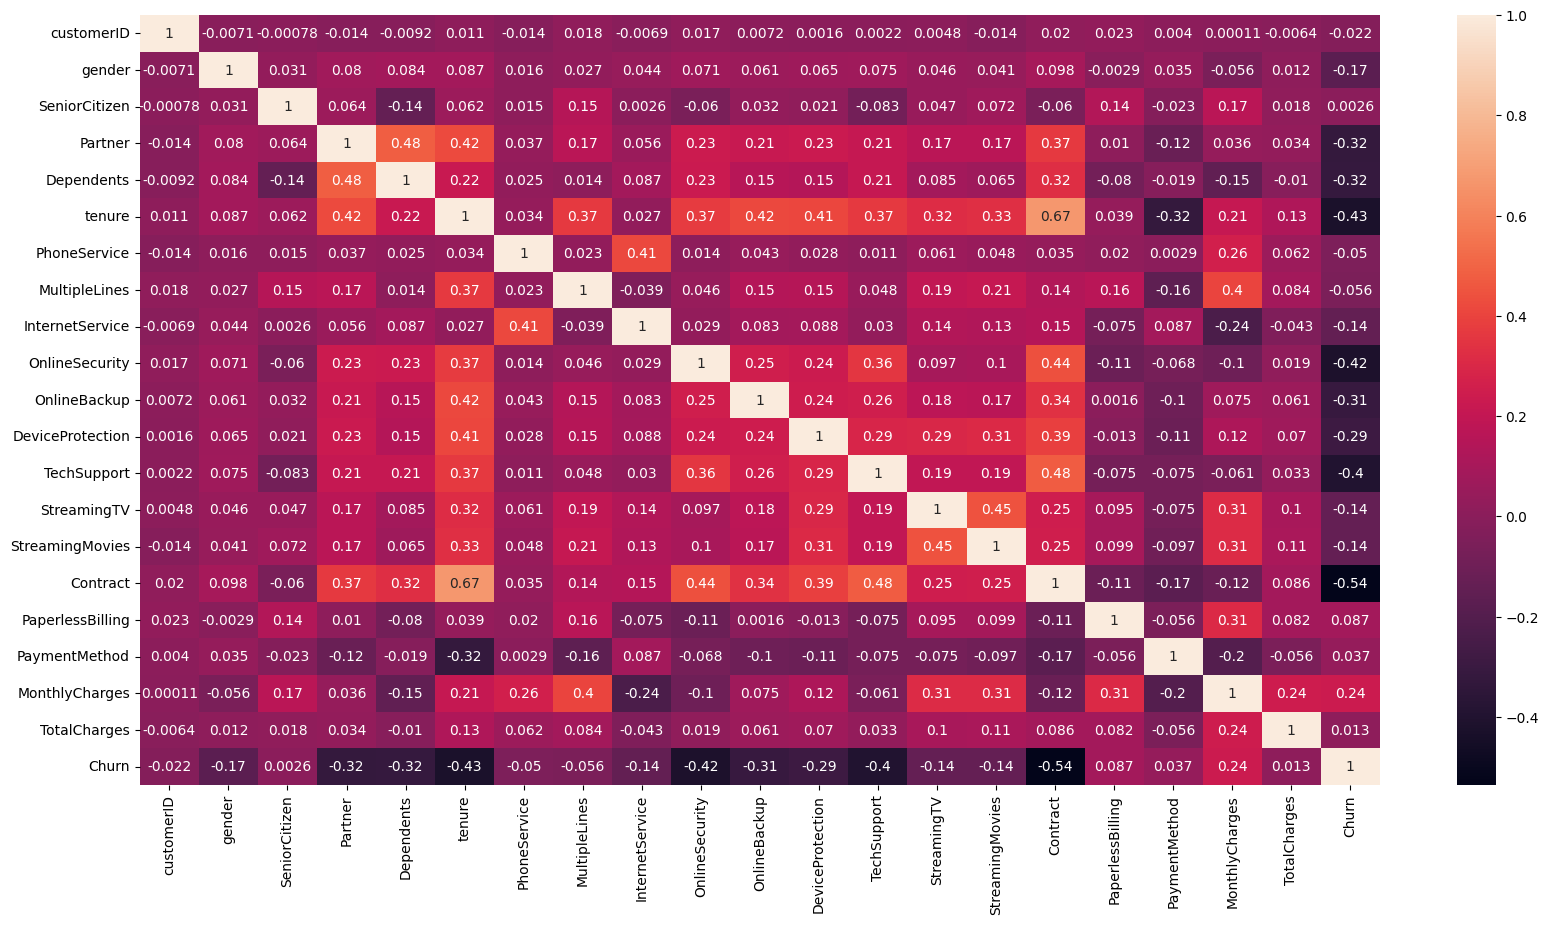

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

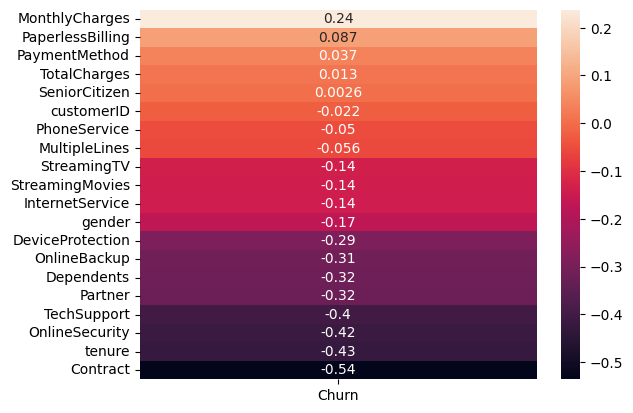

In [ ]:
price_corr=df.corr()['Churn'].sort_values(ascending=False)
price_corr=price_corr.drop('Churn')

sns.heatmap(price_corr.to_frame(),annot=True)
plt.show()

In [ ]:
cor = df.corr()['Churn'].sort_values(ascending=False)

In [ ]:
cor

,Churn
Churn,1.000000
MonthlyCharges,0.237758
PaperlessBilling,0.087486
PaymentMethod,0.036651
TotalCharges,0.012516
SeniorCitizen,0.002590
customerID,-0.022416
PhoneService,-0.050000
MultipleLines,-0.055565
StreamingTV,-0.136460


In [ ]:
df.drop('customerID',axis=1,inplace=True)
df.drop('TotalCharges',axis=1,inplace=True)
df.drop('gender',axis=1,inplace=True)
df.drop('PhoneService',axis=1,inplace=True)
df.drop('MultipleLines',axis=1,inplace=True)
df.drop('InternetService',axis=1,inplace=True)
df.drop('StreamingTV',axis=1,inplace=True)
df.drop('StreamingMovies',axis=1,inplace=True)
df.drop('PaperlessBilling',axis=1,inplace=True)
df.drop('PaymentMethod',axis=1,inplace=True)


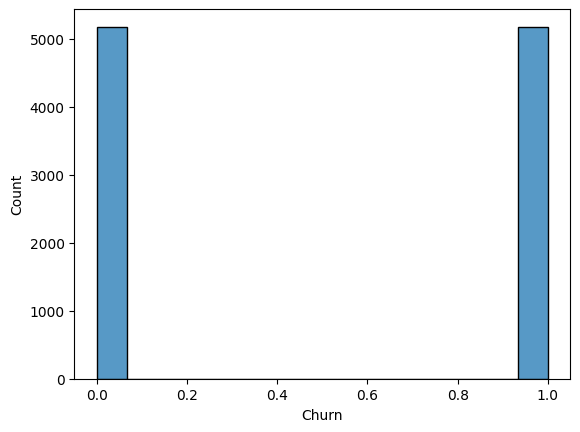

In [ ]:
sns.histplot(data=df,x='Churn')
plt.show()

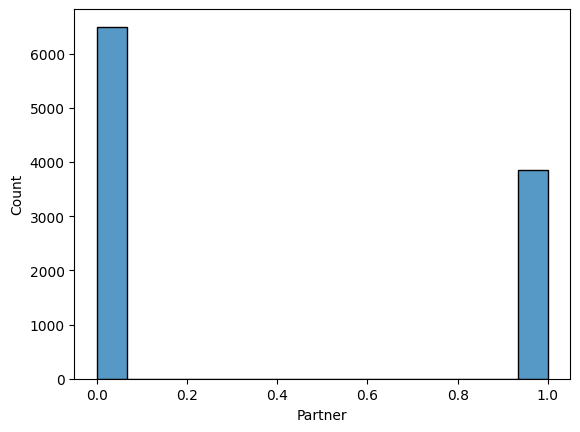

In [ ]:
sns.histplot(data=df,x='Partner')
plt.show()

In [ ]:
df['Partner']=np.log1p(df['Partner'])

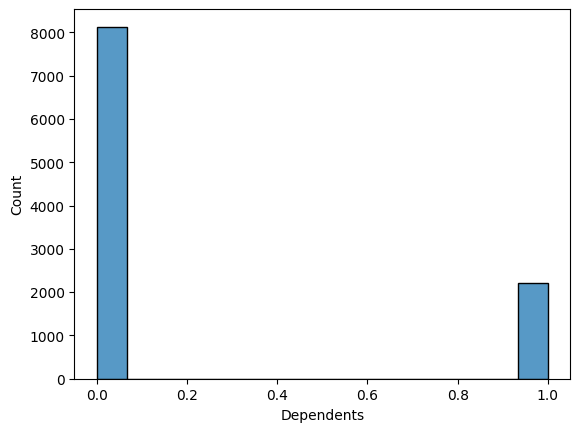

In [ ]:
sns.histplot(data=df,x='Dependents')
plt.show()

In [ ]:
df['Dependents']=np.log1p(df['Dependents'])

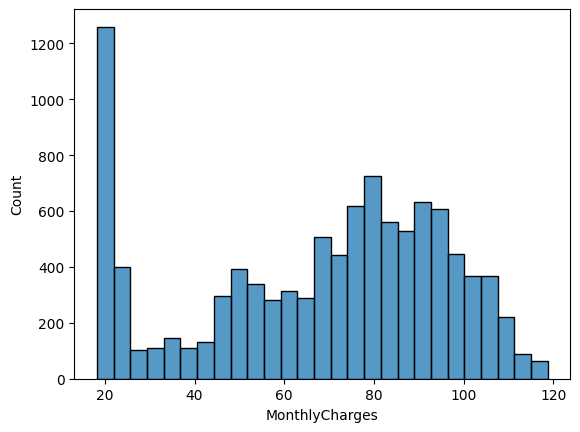

In [ ]:
sns.histplot(data=df,x='MonthlyCharges')
plt.show()

In [ ]:
df['MonthlyCharges']=np.log1p(df['MonthlyCharges'])

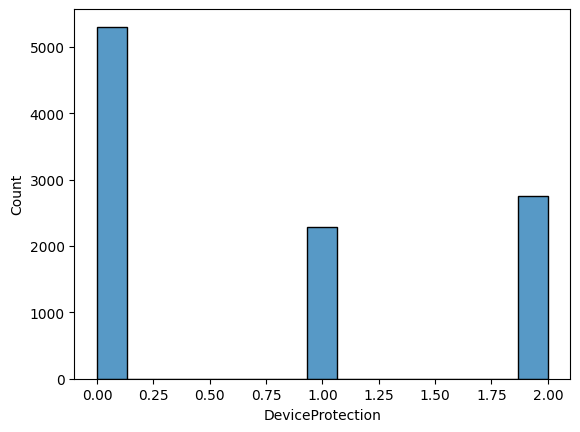

In [ ]:
sns.histplot(data=df,x='DeviceProtection')
plt.show()

In [ ]:
df['Deviceprotection']=np.log1p(df['DeviceProtection'])

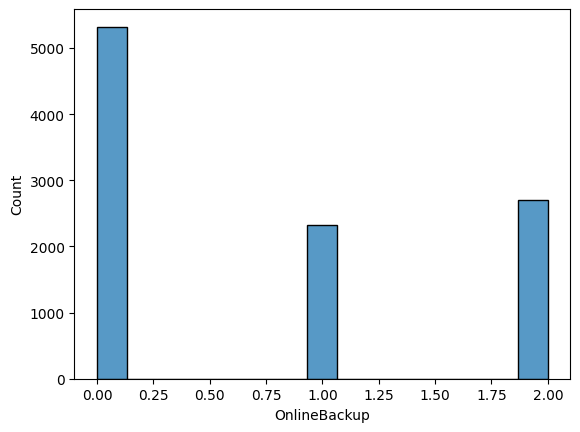

In [ ]:
sns.histplot(data=df,x='OnlineBackup')
plt.show()

In [ ]:
df['OnlineBackup']=np.log1p(df['OnlineBackup'])

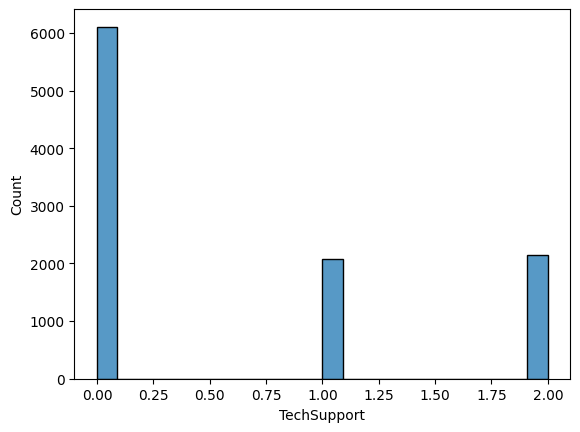

In [ ]:
sns.histplot(data=df,x='TechSupport')
plt.show()

In [ ]:
df['TechSupport']=np.log1p(df['TechSupport'])

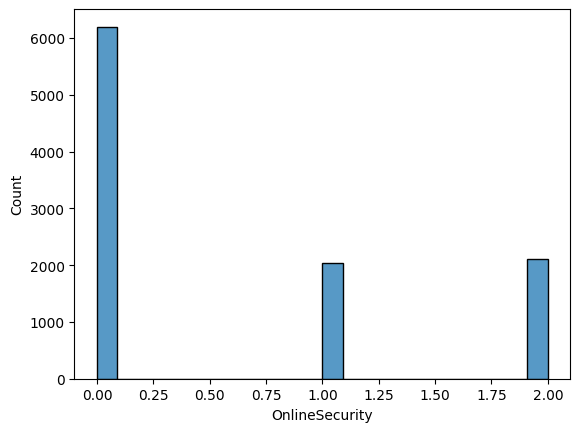

In [ ]:
sns.histplot(data=df,x='OnlineSecurity')
plt.show()

In [ ]:
df['OnlineSecurity']=np.log1p(df['OnlineSecurity'])

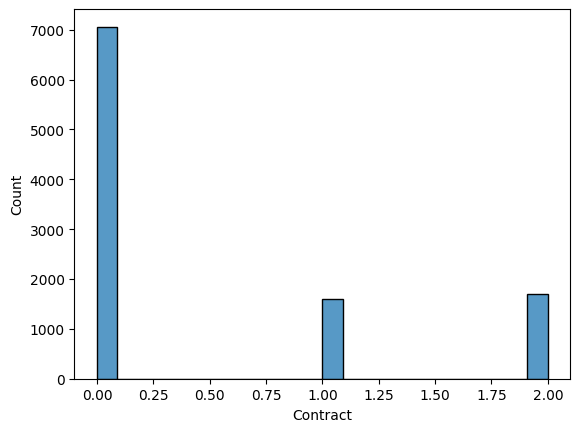

In [ ]:
sns.histplot(data=df,x='Contract')
plt.show()

In [ ]:
df['Contract']=np.log1p(df['Contract'])

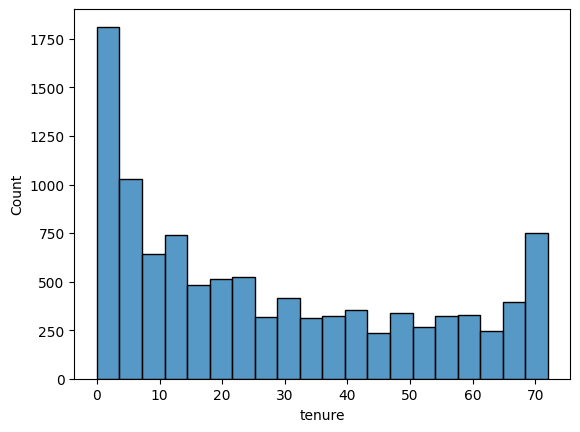

In [ ]:
sns.histplot(data=df,x='tenure')
plt.show()

In [ ]:
df['tenure']=np.log1p(df['tenure'])

<Axes: >

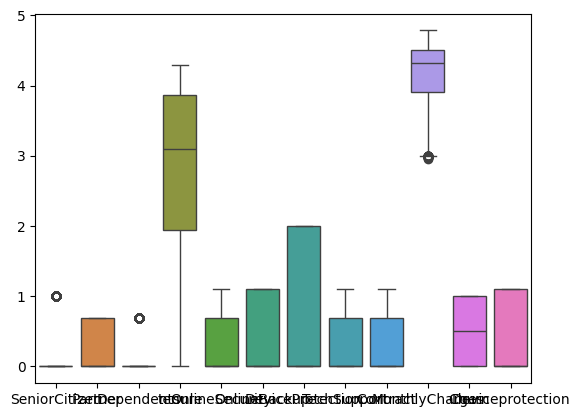

In [ ]:
sns.boxplot(df)

In [ ]:
x=df[['TechSupport','OnlineBackup','OnlineSecurity','tenure','Contract','DeviceProtection','Partner','MonthlyCharges','Dependents']]
y=df['Churn']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred


array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.8033816425120773